In [1]:
from ipywidgets import IntSlider
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
import pandas as pd
import scipy
import shap
import numpy as np
import ZCA as zca
import statsmodels.api as sm
import matplotlib as plt

import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

import sklearn
from sklearn.preprocessing import *
from sklearn import preprocessing
import matplotlib.pyplot as plt

import IPython

import os
os.environ['R_HOME'] = '/mnt/distvol/R/4.0.5/lib64/R/'
import rpy2.robjects as R
from rpy2.robjects import pandas2ri
pandas2ri.activate()

from numpy import mean
from numpy import arange
from numpy import std
from numpy import absolute
from pandas import read_csv
import matplotlib.pyplot
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import shap
from sklearn.linear_model import ElasticNet
import seaborn as sns
from ModelDiagnostics import Plot
from sklearn.cluster import DBSCAN
from clustergram import Clustergram
import urbangrammar_graphics as ugg
from sklearn.preprocessing import scale
from scipy import stats
from scipy.special import boxcox, inv_boxcox
from scipy.stats import f

import dtale
from pandas_profiling import ProfileReport

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [3]:
#power = PowerTransformer(method='box-cox')

def testNormal (x):    
    
    k2, p = stats.normaltest(x)
    alpha = .001
    #print("p = {:g}".format(p))    
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        #print(p)
        #print(alpha)
        print("The null hypothesis can be rejected")
        xt, _ = stats.yeojohnson(x)
        #xt, _ = stats.boxcox(x)        
        print(_)
        xt = pd.DataFrame(xt)
        
        return _, pd.DataFrame(xt).set_index(x.index)
    else:
        print("The null hypothesis cannot be rejected")    
        return 1, pd.DataFrame(x)

def inverse_boxcox (data, lambdas):
    return inv_boxcox(data, lambdas.values)
    
def transform_boxcox_l(data, l_):
    transformed = pd.DataFrame()

    for i in range(0,len(data.columns)):
        #print(i)
        if l_.iloc[i].values == 1:
            inner_scale = data.iloc[:,i]            
        else:
            inner_scale = pd.DataFrame(stats.boxcox((data.iloc[:,i]), lmbda=l_.iloc[i].values))
            
        inner_scale.index = data.index
        transformed = pd.concat([transformed,inner_scale],axis=1)
        
    transformed.columns = data.columns
    return transformed

def transform_boxcox (data):
    transformed = pd.DataFrame()
    transformed_lambdas = pd.DataFrame()

    for i in range(0,len(data.columns)):
        l, inner_scale = testNormal(data.iloc[:,i])
        inner_scale.set_index(data.index)

        transformed_lambdas = pd.concat([transformed_lambdas,pd.DataFrame(pd.Series(l))],axis=0)
        transformed = pd.concat([transformed,inner_scale],axis=1)
        
    transformed.columns = data.columns
    return transformed, transformed_lambdas

def revert_boxcox (data, lambdas):
    reverted = pd.DataFrame()

    for i in range(0,len(data.columns)):        
        if lambdas.iloc[i].values == 1 :
            revert = data.iloc[:,i]
        else:
            revert = pd.DataFrame(inv_boxcox(data.iloc[:,i].values, lambdas.iloc[i].values))            
        revert.index = data.index
        reverted = pd.concat([reverted,revert],axis=1)
        
    reverted.columns = data.columns
    return reverted


In [4]:

all_data = pd.read_csv('/mnt/distvol/combined_set.csv')
all_data.index = all_data.iloc[:,0]
all_data = all_data.iloc[:,1:]

filter_ = all_data.columns.tolist()

In [5]:
def f3(Y):
    
    #Y = x
    #output_slider_variable.value
    internalFilter = filter_.copy()
    internalFilter.remove(Y)
    all_data_ = pd.concat([all_data[Y],all_data[internalFilter]], axis=1)    
    #print(all_data_.describe())
    display(all_data_.describe())
    return(all_data_)
    
out = interactive(f3, Y=filter_)

#output_slider_variable.observe(f4, 'value')

print("choose Y")
display(out)


choose Y


interactive(children=(Dropdown(description='Y', options=('DGS10', 'DTB3', 'DGS3MO', 'MORTGAGE30US', 'DFII10', …

In [124]:
R.r('''
           f <- function(values) {
                    #system("which openssl")

                    library(snpEnrichment)
                    library(arfima)
                    library(parallel)
                    library(forecast)                    
                    
                    dset <- lapply(1:ncol(values),function(x)
                    {
                        column = values[,x]
                        
                        
                        #tryCatch(invisible(capture.output(suppressMessages(suppressWarnings(
                        #{
                          varvefd = arfima(column)
                          d = summary(varvefd)$coef[[1]][1]
                          return(d)
                        #}
                       #)
                       #))),
                        #error=function(e)
                          #{
                            #d = 1
                            #return(d)
                          #})
                    
                    })    
                    
                    unlist(dset)

            }
            ''')

r_f = R.globalenv['f']
d=R.conversion.rpy2py((r_f(R.conversion.py2rpy(out.result.dropna()))))


2021-05-22 13:38:50,457 - WARNING  - R[write to console]: Error in stats::arima(x = x, order = order, seasonal = seasonal, include.mean = include.mean,  : 
  non-stationary AR part from CSS

2021-05-22 13:38:59,499 - WARNING  - R[write to console]: Error in stats::arima(x = x, order = order, seasonal = seasonal, include.mean = include.mean,  : 
  non-stationary AR part from CSS

2021-05-22 13:39:00,014 - WARNING  - R[write to console]: Error in stats::arima(x = x, order = order, seasonal = seasonal, include.mean = include.mean,  : 
  non-stationary AR part from CSS

2021-05-22 13:39:00,076 - WARNING  - R[write to console]: Error in stats::arima(x = x, order = order, seasonal = seasonal, include.mean = include.mean,  : 
  non-stationary AR part from CSS

2021-05-22 13:39:02,347 - WARNING  - R[write to console]: Error in stats::arima(x = x, order = order, seasonal = seasonal, include.mean = include.mean,  : 
  non-stationary AR part from CSS



In [7]:
d

array([2.71776596e-01, 1.29709976e-01, 1.83542206e-01, 2.19398733e-01,
       9.32186792e-02, 4.58301292e-05, 4.97179539e-01, 4.80563313e-01,
       1.43365136e-01, 4.66944216e-01, 7.32402798e-05, 4.58301292e-05,
       4.96827793e-01, 4.58301292e-05, 1.15909458e-01, 1.18399093e-01,
       4.58301292e-05, 3.83916321e-02, 4.58301292e-05, 4.58301292e-05,
       4.58301292e-05, 4.58301292e-05, 4.58301292e-05, 4.58301292e-05,
       4.58301292e-05, 4.58301292e-05, 4.58301292e-05, 1.32427863e-02,
       2.38011173e-01, 8.21846395e-02, 4.58301292e-05, 4.58301292e-05,
       4.93862264e-01, 1.61286004e-03, 1.15258054e-01, 1.60185172e-01,
       4.95793469e-01, 4.96868956e-01, 4.64181871e-01, 4.96994998e-01,
       4.58301292e-05, 4.58301292e-05, 3.19912577e-02, 4.58301292e-05,
       5.28241213e-02, 4.58301292e-05, 4.58301292e-05, 1.21312196e-02,
       4.90565014e-01, 7.05382141e-02, 4.97176357e-01, 3.12804721e-02,
       4.58301292e-05, 4.58301292e-05, 4.58301292e-05, 4.96852289e-01,
      

In [8]:
d_ = dtale.show(out.result)
d_.open_browser()
d_._url  

'http://slurmw01:40000'

In [9]:
def get_weights(d, num_k):
    r"""Calculate weights ($w$) for each lag ($k$) through
    $w_k = -w_{k-1} \frac{d - k + 1}{k}$.
    
    Args:
        d (int): differencing value.
        num_k (int): number of lags (typically length of timeseries) to calculate w.
    """
    w_k = np.array([1])
    
    for k in range(1, num_k):
        w_k = np.append(w_k, -w_k[-1] * ((d - k + 1)) / k)
        
    w_k = w_k.reshape(-1, 1) 
    
    return w_k

def get_weights_floored(d, num_k, floor=1e-3):
    r"""Calculate weights ($w$) for each lag ($k$) through
    $w_k = -w_{k-1} \frac{d - k + 1}{k}$ provided weight above a minimum value
    (floor) for the weights to prevent computation of weights for the entire
    time series.
    
    Args:
        d (int): differencing value.
        num_k (int): number of lags (typically length of timeseries) to calculate w.
        floor (float): minimum value for the weights for computational efficiency.
    """
    w_k = np.array([1])
    k = 1
    
    while k < num_k:
        w_k_latest = -w_k[-1] * ((d - k + 1)) / k
        if abs(w_k_latest) <= floor:
            break

        w_k = np.append(w_k, w_k_latest)
        
        k += 1

    w_k = w_k.reshape(-1, 1) 
    
    return w_k

def frac_diff(df, d, floor=1e-3):
    r"""Fractionally difference time series via CPU.
    
    Args:
        df (pd.DataFrame): dataframe of raw time series values.
        d (float): differencing value from 0 to 1 where > 1 has no FD.
        floor (float): minimum value of weights, ignoring anything smaller.
    """
    # Get weights window
    weights = get_weights_floored(d=d, num_k=len(df), floor=floor)
    weights_window_size = len(weights)
    
    # Reverse weights
    weights = weights[::-1]
    
    # Blank fractionally differenced series to be filled
    df_fd = []

    # Slide window of time series, to calculated fractionally differenced values
    # per window
    for idx in range(weights_window_size, df.shape[0]):
        # Dot product of weights and original values
        # to get fractionally differenced values
        date_idx = df.index[idx]
        df_fd.append(np.dot(weights.T, df.iloc[idx - weights_window_size:idx]).item())
    
    # Return FD values and weights
    df_fd = pd.DataFrame(df_fd)
    
    return df_fd, weights

In [125]:
import concurrent.futures
from concurrent.futures import wait, ALL_COMPLETED
from fracdiff import fdiff

cores = int(len(os.sched_getaffinity(0)))

def getDifferenced(i):
    #v = d[[i]]
    #gquant_gpu, weights = frac_diff(all_data.iloc[:, i], d=d[[i]], floor=5e-5)
    
    a = np.array(out.result.iloc[:, i])
    
    return fdiff(a, n=d[i], axis=0)
    #gquant_gpu, weights = frac_diff(all_data.iloc[:, i]), d=v, floor=5e-5)

pool01 = concurrent.futures.ProcessPoolExecutor(cores)

futures01 = [pool01.submit(getDifferenced, args) for args in range(0,len(d))]

wait(futures01, timeout=None, return_when=ALL_COMPLETED)


DoneAndNotDoneFutures(done={<Future at 0x7f2f5a9d80d0 state=finished returned ndarray>, <Future at 0x7f2f5858a100 state=finished returned ndarray>, <Future at 0x7f2f4b5722b0 state=finished returned ndarray>, <Future at 0x7f2f5aa402e0 state=finished returned ndarray>, <Future at 0x7f2f4b568340 state=finished returned ndarray>, <Future at 0x7f2f5a9ca3d0 state=finished returned ndarray>, <Future at 0x7f2f5a9ca430 state=finished returned ndarray>, <Future at 0x7f2f5aa40490 state=finished returned ndarray>, <Future at 0x7f2f4b572520 state=finished returned ndarray>, <Future at 0x7f2f5a9f2550 state=finished returned ndarray>, <Future at 0x7f2f4b5725b0 state=finished returned ndarray>, <Future at 0x7f2f4b572670 state=finished returned ndarray>, <Future at 0x7f2f4b568700 state=finished returned ndarray>, <Future at 0x7f2f4b572700 state=finished returned ndarray>, <Future at 0x7f2f4b572760 state=finished returned ndarray>, <Future at 0x7f2f4b572910 state=finished returned ndarray>, <Future at 0

In [126]:
Differenced_Set = pd.DataFrame()
for f in range(0,len(futures01)):
    value = pd.DataFrame(futures01[f].result())
    Differenced_Set = pd.concat([Differenced_Set,value],axis=1)
    
Differenced_Set.columns = out.result.columns
Differenced_Set.index = out.result.index

In [12]:
if False:
    for f in range(0,len(futures01)):
        #print(f)
        #print(len(futures01[f].result()))
        plt.hist(Differenced_Set.iloc[:,f], bins='auto')  # arguments are passed to np.histogram
        plt.show()
        Differenced_Set.iloc[:,1].plot()
        plt.show()
        plt.hist(all_data.iloc[:,f], bins='auto')  # arguments are passed to np.histogram
        plt.show()
        all_data.iloc[:,1].plot()
        plt.show()    



In [13]:
c = out.result.corr()
#.abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)

In [118]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

def critical_r(n, alpha = .05 ):
    df = n - 2
    critical_t = scipy.stats.t.isf(alpha / 2, df)
    critical_r = np.sqrt( (critical.t^2) / ( (critical.t^2) + df ) )
    return(critical_r)

def xcorr(x, y, maxlags=10):
    Nx = len(x)
    if Nx != len(y):
        raise ValueError('x and y must be equal length')

    c = np.correlate(x, y, mode=2)

    if maxlags is None:
        maxlags = Nx - 1

    if maxlags >= Nx or maxlags < 1:
        raise ValueError('maxlags must be None or strictly positive < %d' % Nx)

    c = c[Nx - 1 - maxlags:Nx + maxlags]

    return c

def getLagged_Set(set_, og):

    #set_.index = all_data.index

    maxl = 5
    Lagged_Differenced_Set = pd.DataFrame()
    Lagged_Set = pd.DataFrame()
    #TrainO_Lagged_Set = pd.DataFrame()
    lags = []
    lagcorrs = []
    ogcorrs = []

    for f in range(1,len(set_.columns)):
        #print(f)
        #print(len(futures01[f].result()))

        data_1 = set_.iloc[:,0]
        data_2 = set_.iloc[:,f]

        ogc = np.array(pd.concat([data_1 - np.mean(data_1),data_2 - np.mean(data_2)],axis=1).corr())[1,0]    
        ogcorrs.append(ogc)

        #corr = xcorr(data_1 - np.mean(data_1), data_2 - np.mean(data_2),maxlags=5)

        set1 = data_1 - np.mean(data_1)
        set2 = data_2 - np.mean(data_2)

        corrs_ = []
        for i in range(0,maxl):
            c = np.array((pd.concat([set1,set2.shift(i)],axis=1).dropna()).corr())[0,1]
            corrs_.append(c)

        #corr = np.correlate(data_1 - np.mean(data_1), data_2 - np.mean(data_2),mode='full')
        #plt.plot(corr)
        #plt.show()

        #lag = corr.argmax() - (len(data_1) - 1)
        lag = abs(pd.Series(corrs_)).idxmax()

        #print(corr)
        lagc = np.array(pd.concat([data_1 - np.mean(data_1),(data_2 - np.mean(data_2)).shift(lag)],axis=1).corr())[1,0]

        #print(lag)

        #print(ogc)
        #print(lagc)

        #print(lag)
        #plt.plot(data_1, 'r*')
        #plt.plot(data_2, 'b*')

        lag_merged = pd.concat([data_1 - np.mean(data_1),(data_2 - np.mean(data_2)).shift(lag)],axis=1)

        x_ticks = all_data.index[np.arange(0, len(all_data.index), 5)]
        #plt.xticks(x_ticks, rotation = 45)    
        #plt.show()

        #plt.scatter(data_2.shift(lag),data_1)
        #plt.show()

        #plot_acf(data_2.shift(lag))
        #plt.show()

        #plot_pacf(data_2.shift(lag))
        #plt.show()

        y = data_1
        X = data_2
        #reg = LinearRegression().fit(X, y)

        #print(reg.score(X, y),reg.coef_,reg.intercept_)

        model = sm.OLS(y,X)
        results = model.fit()
        #print(results.summary())

        Lagged_Differenced_Set = pd.concat([Lagged_Differenced_Set,data_2.shift(lag)],axis=1)
        #TrainO_Lagged_Set = pd.concat([TrainO_Lagged_Set,all_data.iloc[:,f].shift(lag)],axis=1)
        #if lag>0:
            #lag = 0

        Lagged_Set = pd.concat([Lagged_Set,og.iloc[:,f].shift(lag)],axis=1)

        lagcorrs.append(lagc)

        lags.append(lag)

    stats = pd.concat([pd.DataFrame(set_.columns[1:]),pd.DataFrame(lags),pd.DataFrame(lagcorrs),pd.DataFrame(ogcorrs)],axis=1)
        
    return stats, pd.concat([data_1,Lagged_Set],axis=1),  pd.concat([data_1,Lagged_Differenced_Set],axis=1)


In [127]:
Lagged_Set = pd.DataFrame()
Lagged_Differenced_Set = pd.DataFrame()

ls_stats, Lagged_Set, Lagged_Differenced_Set = getLagged_Set(Differenced_Set, out.result)
lso_stats, Lagged_Set_offset, Lagged_Differenced_Set_offset = getLagged_Set(pd.concat([Differenced_Set.iloc[:,0].shift(-1),Differenced_Set.iloc[:,1:]],axis=1), out.result)
                
Lagged_Set_offset.dropna(inplace= True)
Lagged_Differenced_Set.dropna(inplace= True)



<AxesSubplot:>

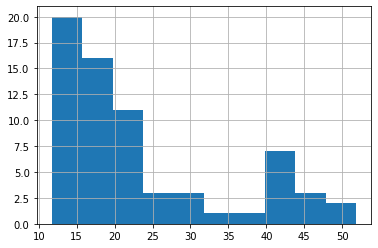

In [25]:
print(ls_stats)
print(lso_stats)

               0  0         0         0
0          DGS10  2 -0.491426 -0.265652
1           DTB3  3 -0.149285 -0.117747
2         DGS3MO  2 -0.132734 -0.099650
3   MORTGAGE30US  2 -0.502860 -0.332782
4         DFII10  1 -0.595821 -0.534740
..           ... ..       ...       ...
85           UNH  0  0.895927  0.895927
86            VZ  0  0.803211  0.803211
87           WMT  0  0.843633  0.843633
88           WBA  4  0.636863  0.502566
89           DIS  0  0.869107  0.869107

[90 rows x 4 columns]
               0  0         0         0
0          DGS10  1 -0.491426 -0.440338
1           DTB3  4 -0.171843 -0.142448
2         DGS3MO  4 -0.146109 -0.127065
3   MORTGAGE30US  4 -0.519484 -0.475969
4         DFII10  0 -0.595821 -0.595821
..           ... ..       ...       ...
85           UNH  0  0.893715  0.893715
86            VZ  0  0.773978  0.773978
87           WMT  0  0.802996  0.802996
88           WBA  3  0.636863  0.488593
89           DIS  4  0.803267  0.746237

[90 rows x 4 col

In [26]:
Lagged_Differenced_Set
#from fracdiff import FracdiffStat
#fs = FracdiffStat(window=100, mode="valid")
#diff = fs.fit_transform(nky.values.reshape(-1, 1))

^SP500TR     DGS10      DTB3    DGS3MO  MORTGAGE30US    DFII10  \
Unnamed: 0                                                                      
2003-09-30  1450.154060       NaN       NaN       NaN           NaN       NaN   
2003-12-31  1538.352655       NaN       NaN       NaN           NaN  2.203906   
2004-03-31  1656.617904  4.227656       NaN  0.947812      6.033846  1.805361   
2004-06-30  1649.337585  3.136183  0.928281  0.761198      4.595468  1.411828   
2004-09-30  1628.109837  2.427037  0.795238  0.691051      3.782129  1.743691   
...                 ...       ...       ...       ...           ...       ...   
2020-03-31  6212.746133  0.354932  1.666975  1.115835      1.608807  0.037752   
2020-06-30  5992.283660  0.531741  1.319551  0.730669      1.760076 -0.158119   
2020-09-30  6816.042351  0.178624  0.933277  0.307194      1.618877 -0.540136   
2020-12-31  7328.190300 -0.338343  0.491868 -0.532349      1.400303 -0.940988   
2021-03-31  8001.513472 -0.114075 -0.362118 -0.327824      1.211842 -0.843875   

              T5YIFR  BAMLHYH0A0HYM2TRIV  BAMLCC0A1AAATRIV      DGS1  ...  \
Unnamed: 0                                                            ...   
2003-09-30       NaN          417.532687        347.606716       NaN  ...   
2003-12-31       NaN          233.867655        185.500844       NaN  ...   
2004-03-31       NaN          190.228973        149.876881  1.219219  ...   
2004-06-30  2.268125          146.013410        114.583544  1.121658  ...   
2004-09-30  2.537315          142.546125        111.839104  0.960719  ...   
...              ...                 ...               ...       ...  ...   
2020-03-31  1.944652          258.672106        178.962768  1.067946  ...   
2020-06-30  1.834268          201.409451        200.035514  0.854431  ...   
2020-09-30  1.755550          327.442576        204.092265  0.404244  ...   
2020-12-31  1.572655          337.781474        178.639279 -0.388200  ...   
2021-03-31  1.482939          356.290356        147.010749 -0.247752  ...   

                  MRK       MSFT        NKE          PG        TRV        UNH  \
Unnamed: 0                                                                      
2003-09-30        NaN        NaN   5.572157         NaN  22.987969  21.319325   
2003-12-31  27.587086        NaN   3.797042         NaN  13.396768  11.655751   
2004-03-31  21.401864  17.235299   3.450437   27.368460  12.736108  11.745792   
2004-06-30  21.610158   8.930541   2.541826   29.681616   9.849975  10.046094   
2004-09-30  21.251378   6.561398   2.413771   31.455443   4.958140   8.841159   
...               ...        ...        ...         ...        ...        ...   
2020-03-31  66.660161  43.553275  21.005691  113.028189  16.131053  68.514844   
2020-06-30  62.981894  44.894879  19.346246  117.781530   3.899829  70.999950   
2020-09-30  60.052770  54.874905  33.974816  116.199859  23.496226  83.513280   
2020-12-31  63.748302  60.629326  51.262426  113.627895  36.180834  98.721896   
2021-03-31  62.007905  76.978450  43.420599  130.212312  48.887235  92.244560   

                   VZ        WMT        WBA        DIS  
Unnamed: 0                                              
2003-09-30  13.911913  39.559052        NaN  16.798414  
2003-12-31   6.067687  19.764847        NaN   9.643745  
2004-03-31   6.664125  15.935334        NaN   9.305043  
2004-06-30   4.749367  12.838984        NaN   6.169089  
2004-09-30   5.102193   9.245523  22.003943   4.487760  
...               ...        ...        ...        ...  
2020-03-31   9.975453  25.499680  42.984988  18.391832  
2020-06-30  10.150117  33.787033  30.112728   6.992174  
2020-09-30  12.643137  39.352044  32.788487  30.094657  
2020-12-31  13.225959  45.231862  37.769869  43.394704  
2021-03-31   9.654288  30.787923  31.704027  74.226636  

[71 rows x 91 columns]

In [27]:
transformed, lambdas = transform_boxcox(Lagged_Differenced_Set.dropna())

The null hypothesis cannot be rejected
The null hypothesis cannot be rejected
The null hypothesis cannot be rejected
The null hypothesis cannot be rejected
The null hypothesis cannot be rejected
The null hypothesis cannot be rejected
The null hypothesis cannot be rejected
The null hypothesis cannot be rejected
The null hypothesis can be rejected
-0.7830189893827145
The null hypothesis cannot be rejected
The null hypothesis cannot be rejected
The null hypothesis cannot be rejected
The null hypothesis cannot be rejected
The null hypothesis cannot be rejected
The null hypothesis can be rejected
2.33615184463479
The null hypothesis cannot be rejected
The null hypothesis cannot be rejected
The null hypothesis can be rejected
-8.971378904843366
The null hypothesis cannot be rejected
The null hypothesis cannot be rejected
The null hypothesis can be rejected
-3.923078815540217
The null hypothesis can be rejected
-1.249030285098391
The null hypothesis can be rejected
-1.7936617897970866
The nul

In [135]:
#Difference (only if not using differenced)
#transformed = (transformed - transformed.shift(-1)).dropna()

DGS10      DTB3    DGS3MO  MORTGAGE30US    DFII10    T5YIFR  \
Unnamed: 0                                                                   
2004-09-30  4.301406  1.240973  1.170057      3.561250  1.534489  2.481008   
2004-12-31  4.175806  1.684174  1.592081      3.265256  1.309160  2.410222   
2005-03-31  4.303607  2.104959  1.979052      3.210545  1.333929  2.453002   
2005-06-30  4.158594  2.298853  2.137906      3.054770  1.281342  2.388926   
2005-09-30  4.215156  2.681254  2.492514      3.041456  1.417925  2.339072   
...              ...       ...       ...           ...       ...       ...   
2020-03-31  1.365000  0.491868  0.307194      1.618877 -0.158119  1.572655   
2020-06-30  0.687619 -0.362118 -0.532349      1.400303 -0.540136  1.482939   
2020-09-30  0.650625 -0.226975 -0.327824      1.211842 -0.940988  1.715246   
2020-12-31  0.864516 -0.161576 -0.232789      1.135806 -0.843875  1.874291   
2021-03-31  1.335902 -0.142955 -0.195428      1.354271 -0.735417  2.053703   

            BAMLHYH0A0HYM2TRIV  BAMLCC0A1AAATRIV      DGS1  BAMLCC0A4BBBTRIV  \
Unnamed: 0                                                                     
2004-09-30          417.532687          1.250918  1.663095         30.352272   
2004-12-31          233.867655          1.245106  1.959107         22.706407   
2005-03-31          190.228973          1.244520  2.442115         20.612820   
2005-06-30          146.013410          1.242847  2.553155         17.942004   
2005-09-30          142.546125          1.240156  2.882623         17.781574   
...                        ...               ...       ...               ...   
2020-03-31          269.670613          1.254915  0.404244         22.315891   
2020-06-30          297.524751          1.253485 -0.388200         23.815389   
2020-09-30          297.623273          1.254147 -0.247752         25.023788   
2020-12-31          295.709739          1.255959 -0.170259         24.553527   
2021-03-31          258.672106          1.256269 -0.133266         24.058337   

            ...        MRK      MSFT        NKE        PG        TRV  \
Unnamed: 0  ...                                                        
2004-09-30  ...  27.587086  3.773514   5.572157  1.326830  22.987969   
2004-12-31  ...  21.401864  2.820407   3.797042  1.331890  13.396768   
2005-03-31  ...  21.610158  2.424366   3.450437  1.333790  12.736108   
2005-06-30  ...  21.251378  2.197945   2.541826  1.333338   9.849975   
2005-09-30  ...  19.960261  2.242216   2.413771  1.333199   4.958140   
...         ...        ...       ...        ...       ...        ...   
2020-03-31  ...  60.118647  4.538257  23.414552  1.404859  27.166114   
2020-06-30  ...  61.499123  5.332727  20.954814  1.406437  41.974289   
2020-09-30  ...  64.891265  5.369126  20.476031  1.405924  39.002418   
2020-12-31  ...  66.660161  5.426455  27.158529  1.405064  23.160201   
2021-03-31  ...  62.981894  5.814198  21.005691  1.410104  16.131053   

                  UNH         VZ       WMT        WBA        DIS  
Unnamed: 0                                                        
2004-09-30   8.841159  13.911913  2.454365  22.580906  16.798414  
2004-12-31  13.162466   6.067687  2.301923  20.663383   9.643745  
2005-03-31  14.034077   6.664125  2.068979  19.760940   9.305043  
2005-06-30  14.126242   4.749367  2.112903  20.895795   6.169089  
2005-09-30  13.760587   5.102193  1.982089  21.052125   4.487760  
...               ...        ...       ...        ...        ...  
2020-03-31  68.514844  12.222250  2.971643  30.372063  22.190481  
2020-06-30  70.999950  12.625856  2.970370  33.070866  42.485933  
2020-09-30  83.513280  11.953796  2.781296  38.095149  38.373307  
2020-12-31  98.721896  14.265099  2.972749  31.977066  33.913499  
2021-03-31  92.244560   9.975453  3.074919  25.303877  18.391832  

[67 rows x 91 columns]

In [191]:
cbd = True
ic = True

# evaluate an elastic net model on the dataset
tsize = .20
train, test = train_test_split(transformed.iloc[:,0:], test_size=tsize, shuffle=False)

interaction = PolynomialFeatures(degree=2, include_bias=False, interaction_only=ic)

#train_t, lambdas_t = transform_boxcox(train)

#disabled boxcox
if cbd:
    train_t = train

scaler = preprocessing.StandardScaler().fit(train_t)

#
train_s = pd.DataFrame(scaler.transform(train_t))
train_s.columns = train.columns
train_s.index = train.index  

train_t = train_s

#test_t = transform_boxcox_l(test, lambdas_t)

#disabled boxcox
if cbd:
    test_t = test

test_s = pd.DataFrame(scaler.transform(test_t))
test_s.columns = test.columns
test_s.index = test.index

test_t = test_s

y_train = pd.DataFrame(train_t.iloc[:,0])

#exclude y

X_inter_train = pd.DataFrame(interaction.fit_transform(train_t.iloc[:,1:]), columns=interaction.get_feature_names(input_features=pd.DataFrame(train_t.iloc[:,1:]).columns))

    #apply ZCA each time a set of factors are removed (i.e. iteratively)
 #trf = zca.ZCA().fit(X_inter_train)
  #trf = zca.ZCA().fit(X_train)

 #X_train = pd.DataFrame(trf.transform(X_inter_train))
  #X_train = pd.DataFrame(trf.transform(X_train))
 #X_train.columns=X_inter_train.columns
  #X_train.columns=X_train.columns
  #X_train.index = train.index

#X_inter_alt = X_train.iloc[:, np.array(range(0,len(all_data.iloc[:,2:].columns)))]
#print(X_inter_alt.head(3))

y_test = pd.DataFrame(test_t.iloc[:,0])

X_inter_test = pd.DataFrame(interaction.fit_transform(test_t.iloc[:,1:]), columns=interaction.get_feature_names(input_features=pd.DataFrame(test_t.iloc[:,1:]).columns))

 #X_test = pd.DataFrame(trf.transform(X_inter_test))
  #X_test = pd.DataFrame(trf.transform(X_test))

 #X_test.columns=X_inter_test.columns
  #X_test.columns=X_test.columns
  #X_test.index = test.index

#X_inter_t_alt = X_test.iloc[:, np.array(range(0,len(all_data.iloc[:,2:].columns)))]
#X_inter_t_alt.head()


In [192]:
# define model evaluation method
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV
from scipy.stats import randint

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
ratios = arange(0, 1, 0.01)
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]

 #model = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=4, verbose=0, precompute='auto')

model = ElasticNet()
grid = dict()
# fit model

grid['alpha'] = alphas
grid['l1_ratio'] = ratios

#search = HalvingRandomSearchCV(model, grid,resource='n_samples',max_resources=10,random_state=0)

search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

 #results = search.fit(X_inter_train, y_train)
#results = search.fit(X_train, y_train)

results = search.fit(X_inter_train, y_train)

 #model.fit(X_inter_train, y_train)
# summarize chosen configuration

print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

print(results.best_estimator_)
best_model = ElasticNet(alpha=results.best_estimator_.alpha, l1_ratio = results.best_estimator_.l1_ratio)

#pd.concat([all_data[Y],all_data_int],axis=1)



MAE: -0.040
Config: {'alpha': 0.01, 'l1_ratio': 0.48}
ElasticNet(alpha=0.01, l1_ratio=0.48)


In [193]:
best_model.fit(X_inter_train,train_t.iloc[:,0])

trainScore = best_model.score(X_inter_train, y_train, sample_weight=None)
testScore = best_model.score(X_inter_test, y_test, sample_weight=None)
print(trainScore)
print(testScore)


0.9996178407296584
0.9972717541637722


Unnamed: 0
2004-09-30    0.111466
2004-12-31    0.111466
2005-03-31    0.111466
2005-06-30    0.111466
2005-09-30    0.111466
                ...   
2020-03-31    0.111466
2020-06-30    0.111466
2020-09-30    0.111466
2020-12-31    0.111466
2021-03-31    0.111466
Name: IC4WSA, Length: 67, dtype: float64

0
0   1
1   1
2   1
3   1
4   1
.. ..
62  1
63  1
64  1
65  1
66  1

[67 rows x 1 columns]

In [46]:
Lagged_Set_offset

DGS10      DTB3    DGS3MO  MORTGAGE30US    DFII10    T5YIFR  \
Unnamed: 0                                                                   
2004-09-30  4.175806  1.240973  1.170057      3.561250  1.534489  2.481008   
2004-12-31  4.303607  1.684174  1.592081      3.265256  1.309160  2.410222   
2005-03-31  4.158594  2.104959  1.979052      3.210545  1.333929  2.453002   
2005-06-30  4.215156  2.298853  2.137906      3.054770  1.281342  2.388926   
2005-09-30  4.488197  2.681254  2.492514      3.041456  1.417925  2.339072   
...              ...       ...       ...           ...       ...       ...   
2019-12-31  1.365000  0.933277  0.730669      1.760076  0.037752  1.755550   
2020-03-31  0.687619  0.491868  0.307194      1.618877 -0.158119  1.572655   
2020-06-30  0.650625 -0.362118 -0.532349      1.400303 -0.540136  1.482939   
2020-09-30  0.864516 -0.226975 -0.327824      1.211842 -0.940988  1.715246   
2020-12-31  1.335902 -0.161576 -0.232789      1.135806 -0.843875  1.874291   

            BAMLHYH0A0HYM2TRIV  BAMLCC0A1AAATRIV      DGS1  BAMLCC0A4BBBTRIV  \
Unnamed: 0                                                                     
2004-09-30          233.867655        114.583544  1.663095        197.047610   
2004-12-31          190.228973        111.839104  1.959107        162.689868   
2005-03-31          146.013410        104.613166  2.442115        123.927025   
2005-06-30          142.546125         94.586836  2.553155        121.777265   
2005-09-30          144.586512         91.316710  2.882623        117.017769   
...                        ...               ...       ...               ...   
2019-12-31          269.670613        187.391437  0.854431        190.371180   
2020-03-31          297.524751        172.217585  0.404244        216.681383   
2020-06-30          297.623273        178.962768 -0.388200        239.217270   
2020-09-30          295.709739        200.035514 -0.247752        230.305077   
2020-12-31          258.672106        204.092265 -0.170259        221.116268   

            ...        MRK       MSFT        NKE          PG        TRV  \
Unnamed: 0  ...                                                           
2004-09-30  ...  21.401864   8.930541   3.797042   33.315460  22.987969   
2004-12-31  ...  21.610158   6.561398   3.450437   34.060504  13.396768   
2005-03-31  ...  21.251378   5.431928   2.541826   33.880795  12.736108   
2005-06-30  ...  19.960261   5.641008   2.413771   33.825614   9.849975   
2005-09-30  ...  11.584362   5.890978   3.090144   34.562184   4.958140   
...         ...        ...        ...        ...         ...        ...   
2019-12-31  ...  60.118647  27.466397  23.414552  113.028189  22.467753   
2020-03-31  ...  61.499123  42.718450  20.954814  117.781530  27.166114   
2020-06-30  ...  64.891265  43.553275  20.476031  116.199859  41.974289   
2020-09-30  ...  66.660161  44.894879  27.158529  113.627895  39.002418   
2020-12-31  ...  62.981894  54.874905  21.005691  130.212312  23.160201   

                  UNH         VZ        WMT        WBA        DIS  
Unnamed: 0                                                         
2004-09-30  21.319325  13.911913  12.838984  20.486946   9.643745  
2004-12-31  11.655751   6.067687   9.245523  19.592208   9.305043  
2005-03-31  11.745792   6.664125   9.835456  20.717374   6.169089  
2005-06-30  10.046094   4.749367   8.180100  20.872367   4.487760  
2005-09-30   8.841159   5.102193   5.024975  24.300251   7.133306  
...               ...        ...        ...        ...        ...  
2019-12-31  65.982494  14.312167  33.731630  30.112728  22.190481  
2020-03-31  50.373314  12.222250  33.667952  32.788487  42.485933  
2020-06-30  37.466866  12.625856  25.499680  37.769869  38.373307  
2020-09-30  44.380543  11.953796  33.787033  31.704027  33.913499  
2020-12-31  65.012775  14.265099  39.352044  25.087817  18.391832  

[66 rows x 91 columns]

In [44]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

#pd.DataFrame(Lagged_Set.iloc[:,0].shift(-1)).hist()
#Lagged_Differenced_Set = (all_data - all_data.shift(-1)).dropna()
#Lagged_Differenced_Set_f = pd.concat([Lagged_Differenced_Set.iloc[:,0].shift(-1),Lagged_Differenced_Set.iloc[:,1:]],axis=1)

X, y = Lagged_Set_offset.iloc[:,1:],  Lagged_Set_offset.iloc[:,0]

y = pd.DataFrame(np.where(y > 0, 1, 0))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
#clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_transformed = pd.DataFrame(scaler.transform(X_train))
X_train_transformed.columns = X_train.columns

X_inter_train = X_train_transformed

#X_inter_train = pd.DataFrame(interaction.fit_transform(X_train_transformed), columns=interaction.get_feature_names(input_features=pd.DataFrame(X_train_transformed).columns))

#trf = zca.ZCA().fit(X_inter_train)

#X_inter_train = pd.DataFrame(trf.transform(X_inter_train))
#X_inter_train.columns=pd.DataFrame(X_inter_train).columns
#X_inter_train.index = X_train.index

clf = svm.SVC(kernel='sigmoid', C=1, random_state=42)

scores = cross_val_score(clf, X_inter_train, y_train, cv=5)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

clf = svm.SVC(C=1).fit(X_inter_train, y_train)

X_test_transformed = pd.DataFrame(scaler.transform(X_test))
X_test_transformed.columns = X_test.columns
X_test_transformed.index = X_test.index

X_inter_test = X_test_transformed
#X_inter_test = pd.DataFrame(interaction.fit_transform(X_test_transformed), columns=interaction.get_feature_names(input_features=pd.DataFrame(X_test_transformed).columns))

#X_inter_test = pd.DataFrame(trf.transform(X_inter_test))

predicted = clf.predict(X_inter_test)
#predicted.index = y_test.index

clf.score(X_inter_test, y_test)
#clf.predict(X_test)

nan accuracy with a standard deviation of nan


ValueError: The number of classes has to be greater than one; got 1 class

In [499]:
# multivariate output multi-step 1d cnn example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dense, SimpleRNN, GRU, LSTM
from keras.optimizers import SGD
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

Lagged_Differenced_Set = (all_data - all_data.shift(-1)).dropna()

def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out, xcolumns, ycolumns):
    
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, xcolumns], sequences[end_ix:out_end_ix, ycolumns]
        X.append(seq_x)
        y.append(seq_y)
    
    return array(X), array(y)

#n_steps_in = int(np.floor(len(train)*.8))
print(len(Lagged_Differenced_Set))
n_steps_in = int(np.round(len(Lagged_Differenced_Set)/2))
print(len(Lagged_Differenced_Set) - n_steps_in)
print(n_steps_in)
#n_steps_out = int(len(train)-n_steps_in)
n_steps_out = 1
print(n_steps_out)

#ycolumns = range(0,len(transformed.columns))
ycolumns = range(0,len(Lagged_Differenced_Set.columns[0:1].values))
xcolumns = range(1,len(Lagged_Differenced_Set.columns[1:]))

#trainInner, valid = train_test_split(trainOuter, test_size=0.15, shuffle=False)
#trainInner_whitened = pd.DataFrame(trf.transform(trainInner.iloc[:,1:])).set_index(trainInner.index)
#valid_whitened = pd.DataFrame(trf.transform(valid.iloc[:,1:])).set_index(valid.index)
#test_whitened = pd.DataFrame(trf.transform(test.iloc[:,1:])).set_index(test.index)

trainOuter_whitened=pd.DataFrame(trf.transform(trainOuter.iloc[:,1:])).set_index(trainOuter.index)



X, y = split_sequences(np.array(Lagged_Differenced_Set), n_steps_in, n_steps_out, xcolumns, ycolumns)

#for i in range(len(X)):
#    print(X[i], y[i])
    
#flatten output

if len(ycolumns) > 0:
    n_output = y.shape[1] * y.shape[2]
    y = y.reshape((y.shape[0], n_output))

n_features = X.shape[2]

# define model
modelCNN = keras.models.Sequential([
    keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps_in, n_features)),
    keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps_in, n_features)),
    keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps_in, n_features)),
    keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps_in, n_features)),
    keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps_in, n_features)),
    keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps_in, n_features)),
    keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps_in, n_features)),
    keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps_in, n_features)),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(n_output)
])

# fit model
#model.fit(X, y, epochs=7000, verbose=0)

epochs_ = 200
batch_size_ = 25

#np.random.seed(42)
#tf.random.set_seed(42)


#model.compile(optimizer='adam', loss='mse')
modelCNN.compile(loss="MAPE", optimizer="rmsprop",metrics=['MAPE'])

#model6.compile(loss="MAPE", optimizer="rmsprop",metrics=['MAPE'])

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.33,
                                                    shuffle = False)
                                                    #random_state=42)
scaler = preprocessing.StandardScaler().fit(X_train)

X_train_transformed = pd.DataFrame(scaler.transform(X_train))
X_train_transformed.columns = X_train.columns

X_test_transformed = pd.DataFrame(scaler.transform(X_test))
X_test_transformed.columns = X_test.columns
X_test_transformed.index = X_test.index

    #new_series = pd.DataFrame(ts_train_scaled).append(pd.DataFrame(ts_valid_scaled)).append(pd.DataFrame(ts_test_scaled))

    #series_reshaped = np.array([new_series[i:i + (n_steps+n_ahead)].copy() for i in range(len(data) - (n_steps+n_ahead))])  
    
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                    test_size=0.33,
                                                    shuffle = False)
                                                    #random_state=42)    

#model6.compile(loss="MAPE", optimizer="rmsprop",metrics=['MAPE'])
historyCNN = modelCNN.fit(X_train, y_train, epochs=epochs_,batch_size=batch_size_,validation_data=(X_valid, y_valid), verbose=0)
#history6 = model6.fit(X_train, y_train, epochs=epochs_,batch_size=batch_size_,validation_data=(X_valid, y_valid), verbose=0)
#history = model.fit(X_train, y_train, epochs=epochs_,batch_size=batch_size_,verbose=0)


70
35
35
1


ValueError: Found array with dim 3. StandardScaler expected <= 2.

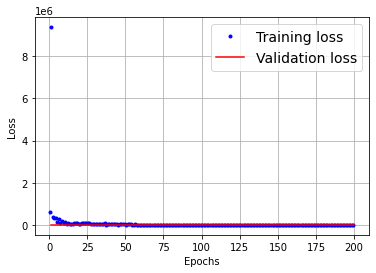

In [497]:
import matplotlib as mpl
plot_learning_curves(historyCNN.history["loss"], history.history["val_loss"])
plt.show()
#plot_learning_curves(history6.history["loss"], history.history["val_loss"])
#plt.show()

array([[ 6.6390123e+00],
       [ 5.3505511e+00],
       [ 1.6195066e+01],
       [ 5.8201642e+00],
       [-1.1553327e+00],
       [-2.3759005e+00],
       [ 2.3246362e+00],
       [ 5.1054525e+00],
       [ 5.6321565e-02],
       [ 8.1175203e+00],
       [ 3.1103765e+01],
       [-1.5818205e+02]], dtype=float32)

2021-05-21 22:07:01,452 - WARNING  - 5 out of the last 5 calls to <function Model.make_predict_function.<locals>.predict_function at 0x7f8b57c2d8b0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


0         0
0    -9.580099 -0.162100
1    -6.262639 -0.003185
2    -3.571585 -0.117338
3    -6.934800  0.388197
4    -1.270923  0.314062
5    11.058039  0.540920
6     1.807868  0.006033
7    -4.258107  0.426935
8     0.106261  0.677381
9    -5.584584  0.036994
10   -4.931961 -0.213891
11  162.356277 -0.471386

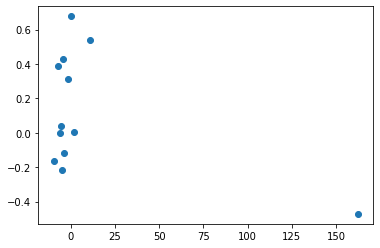

In [498]:
import matplotlib.pyplot as plt
#multi
yhat = modelCNN.predict(X_test, verbose=0)

predicted = []
original = []
if len(ycolumns) > 1:
    results = yhat.reshape(len(y_test), int(yhat.shape[1]/X_test.shape[2]), len(transformed.columns))
    for i in range(0,len(results)):
        predicted.append(pd.DataFrame(results[i])[0][0])
        original.append(pd.DataFrame(y_test[i])[0][0])
        #print(pd.DataFrame(results[i])[0][0])
        #print(pd.DataFrame(y_test[i])[0][0])
else:
    results = yhat
    for i in range(0,len(results)):
        predicted.append(results[i])
        original.append(y_test[i])
        #print(pd.DataFrame(results[i]))
        #print(pd.DataFrame(y_test[i]))
        
plt.scatter(predicted,original)

pd.concat([pd.DataFrame(predicted),pd.DataFrame(original)],axis=1)

In [194]:
coef = pd.DataFrame(best_model.coef_).set_index(X_inter_train.columns)

a_coef = abs(coef)
a_coef.sort_values(by=[0],ascending=False,inplace=True)
chosen_few = a_coef[a_coef>0].dropna().index.values

scaler_ = preprocessing.StandardScaler().fit(transformed)

#
train_ = pd.DataFrame(scaler_.transform(transformed))
train_.columns = transformed.columns
train_.index = transformed.index  

X_inter_train_ = pd.DataFrame(interaction.fit_transform(train_.iloc[:,1:]), columns=interaction.get_feature_names(input_features=pd.DataFrame(train_.iloc[:,1:]).columns))

max_pvalue = 1
New_Names = X_inter_train.columns
X_b = X_inter_train_[chosen_few]
while (max_pvalue > .05):
        
    trf = zca.ZCA().fit(X_b)
        
    X_b_z = pd.DataFrame(trf.transform(X_b))
    X_b_z.columns=pd.DataFrame(X_b).columns
    X_b_z.index = train_.index

    model_ = sm.OLS(train_.iloc[:,0],sm.tools.tools.add_constant(X_b_z, prepend=True, has_constant='skip'))        
    #model_ = sm.OLS(pd.DataFrame(pd.concat([train_.iloc[:,0],X_b_z],axis=1),sm.tools.tools.add_constant(X_b_z, prepend=True, has_constant='skip'))        
    results_ = model_.fit()

    set_ = X_b.columns.tolist()
    
    max_pvalue = max(results_.pvalues[1:])
    if (max_pvalue > .05):
        print(max_pvalue)
        max_pname = (results_.pvalues[1:]).idxmax(axis=1)
        set_.remove(max_pname)
        New_Names = set_
    
        X_b = X_inter_train_[New_Names]
        X_b.index = X_inter_train_.index

#from statsmodels.formula.api import ols
#lm = ols(pd.DataFrame(train_.iloc[:,0]) ~ sm.tools.tools.add_constant(X_b_z, prepend=True, has_constant='skip')).fit()
#table = sm.stats.anova_lm(model_, type=3)
#print(table)
print(results_.summary())

0.7442853110844849
0.08421118739375223
                            OLS Regression Results                            
Dep. Variable:                  DGS10   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3533.
Date:                Thu, 20 May 2021   Prob (F-statistic):           8.41e-56
Time:                        19:48:38   Log-Likelihood:                 170.48
No. Observations:                  67   AIC:                            -281.0
Df Residuals:                      37   BIC:                            -214.8
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [195]:
def findNaNCols(df_):
    for col in df_:        
        num_NaNs = df_[col].isnull().sum()
        if num_NaNs > 0:
            print(f"Column: {col}")
            print(f"Number of NaNs: {num_NaNs}")

findNaNCols(X_b_z)

Summary of Regression
:                            OLS Regression Results                            
Dep. Variable:                  DGS10   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3533.
Date:                Thu, 20 May 2021   Prob (F-statistic):           8.41e-56
Time:                        19:48:51   Log-Likelihood:                 170.48
No. Observations:                  67   AIC:                            -281.0
Df Residuals:                      37   BIC:                            -214.8
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const

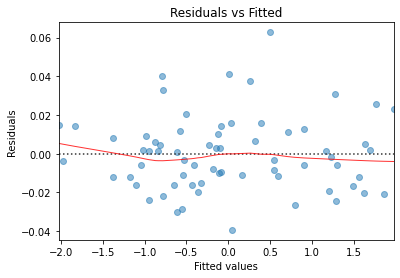

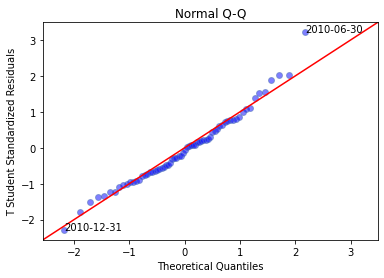

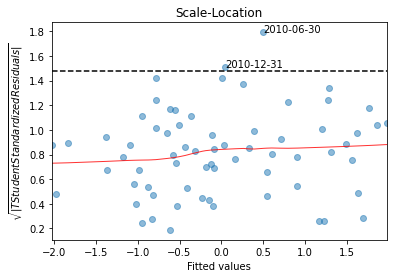

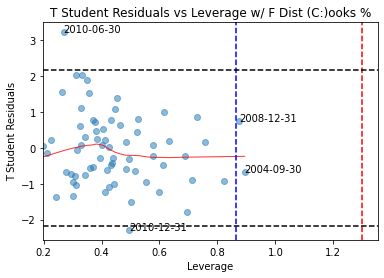

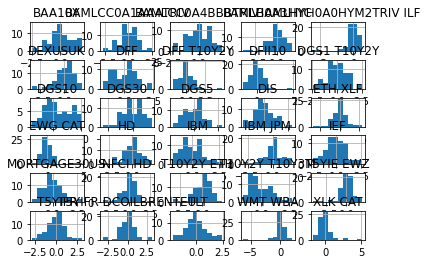

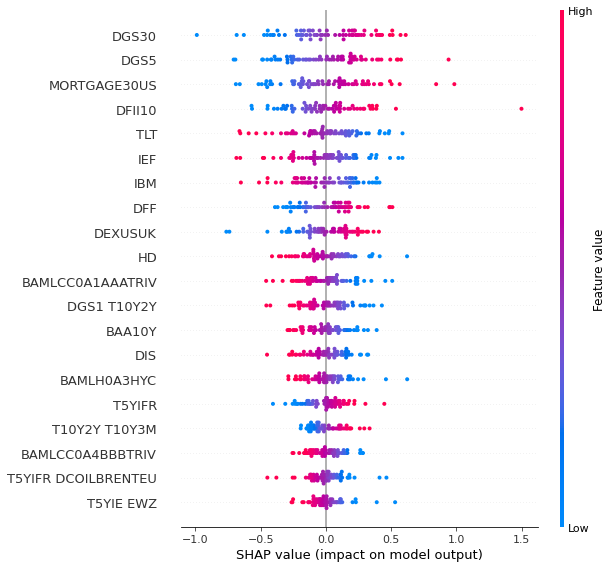

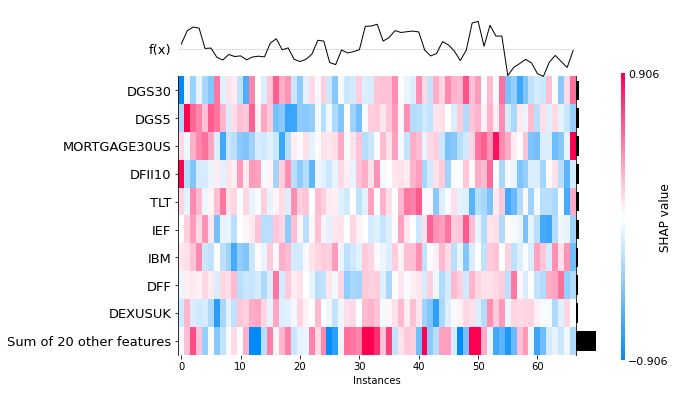

In [196]:

linear_plot = Plot.LinearRegressionResidualPlot(X_b_z, pd.DataFrame(train_.iloc[:,0]))
lm = linear_plot.fit()
summary, diag_res = linear_plot.diagnostic_plots(lm)
print("Summary of Regression\n:{}".format(summary))
print("Diagnostic Tests of Regression\n:{}".format(diag_res))

plt.show()

%matplotlib inline

#sns.pairplot(pd.concat([pd.DataFrame(train[Y]),X_b_z],axis=1), hue=Y, height=2);

pd.concat([pd.DataFrame(train[Y]),X_b_z],axis=1).hist()

plt.show()

model_s = sklearn.linear_model.LinearRegression()
model_s.fit(X_b_z, pd.DataFrame(train_[Y]))

shap.initjs()
e = shap.explainers.Linear(model_s, X_b_z)

shap_values = e.shap_values(X_b_z)
shap.summary_plot(shap_values, X_b_z)
shap.plots.heatmap(e(X_b_z))

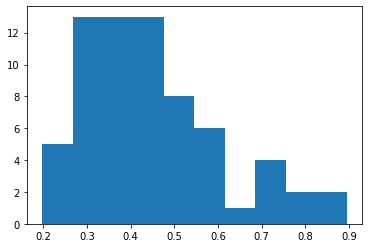

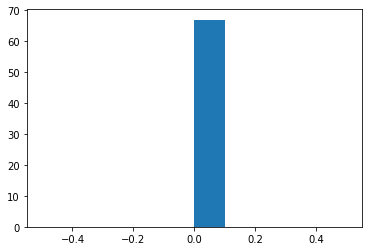

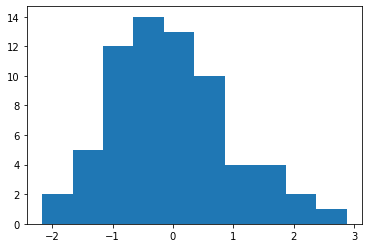

The null hypothesis cannot be rejected
Outlier threshold's
Cooks distance: > .1+
Leverage: > 0.8656716417910447 to 1.2985074626865671
Studentized residuals: > 2.1779230690821856

cooks       0.000000
leverage    0.894096
tsres      -0.681952
sres        0.008320
Name: 2004-09-30, dtype: float64

cooks       0.000000
leverage    0.875461
tsres       0.737371
sres        0.009022
Name: 2008-12-31, dtype: float64

cooks       0.000000
leverage    0.269469
tsres       2.872808
sres        0.021852
Name: 2010-06-30, dtype: float64

[66 16 30 29 28 27 26 25 24 23 22 21 20 19 18 17 15 32 14 13 12 11 10  9
  8  7  6  5  4  3  2  1 31 33 65 50 64 63 62 61 60 59 58 57 56 55 54 53
 52 51 49 34 48 47 46 45 44 43 42 41 40 39 38 37 36 35  0]
[0, 17, 23]


In [198]:
from scipy.stats import f

from statsmodels.graphics.gofplots import ProbPlot
residuals_normalized = lm.get_influence().resid_studentized_internal
cooks = lm.get_influence().cooks_distance[0]
cooks = np.round(f.pdf(cooks,len(lm.tvalues)+1, len(lm.fittedvalues)-len(lm.tvalues)-1),2)

res_std = lm.get_influence().resid_std

leverage = lm.get_influence().hat_matrix_diag

plt.hist(pd.DataFrame(leverage))
plt.show()

plt.hist(pd.DataFrame(cooks))
plt.show()

plt.hist(pd.DataFrame(residuals_normalized))
plt.show()


testNormal(residuals_normalized)

w = res_std
x = cooks
y = leverage
z = residuals_normalized

fitted_y = lm.fittedvalues

labels_ = fitted_y.index

outlier_check = pd.concat([pd.DataFrame(x),pd.DataFrame(y),pd.DataFrame(z),pd.DataFrame(w)],axis=1).set_index(labels_)

outlier_check.columns =  ['cooks', 'leverage', 'tsres', 'sres']

qq = ProbPlot(residuals_normalized)

c_thresh = .1
l_thresh = (2*(len(lm.tvalues)-1)/len(lm.fittedvalues))
s_thresh = max(qq.theoretical_quantiles)

print("Outlier threshold's")
print("Cooks distance: > .1+")
print("Leverage: > " + str(l_thresh) + " to " + str(3 * (len(lm.tvalues)-1)/len(fitted_y)))
print("Studentized residuals: > " + str(s_thresh))
print()

flag = []

for i in range(0,len(outlier_check)):
    if( (outlier_check.iloc[i][0] >= c_thresh) or (outlier_check.iloc[i][1] >= l_thresh) or (abs(outlier_check.iloc[i][2]) >= s_thresh) ):
        print(outlier_check.iloc[i])
        print()
        flag.append(True)
    else:
        flag.append(False)

outlier_check = pd.concat([outlier_check,pd.DataFrame(flag).set_index(labels_)],axis=1)

outlier_check.columns =  ['cooks', 'leverage', 'tsres', 'sres', 'flagged']

print(np.flip(np.argsort(cooks), 0))
#print(outlier_check)

search = outlier_check[outlier_check['flagged']==1].index.to_list()

rows = []

for i in search:
    v = outlier_check.index.to_list().index(i)
    rows.append(v)

print(rows)

In [199]:
def custom_style(row):

    color = 'white'
    if bool(row.flagged) == True:
        color = 'orange'

    return ['background-color: %s' % color]*len(row.values)

all_data[set(all_data.columns) & set(New_Names)]

outlier_check.style.apply(custom_style, axis=1).apply(custom_style, axis=1).background_gradient(cmap ='viridis')


TypeError: 'DataFrame' object is not callable

['DGS10', 'DGS30', 'DFII10', 'DGS5', 'MORTGAGE30US']

In [104]:
df1 = y_train.columns.to_list()
df2 = list(set(set(all_data.columns) & set(New_Names)))

flattened = [] 
for sublist in df1,df2: 
    for val in sublist: 
        flattened.append(val) 

all_data.iloc[rows][flattened].style.background_gradient(cmap ='viridis')